<a href="https://colab.research.google.com/github/ashishkumarsinghh/MachineLearning/blob/master/FBA_Matting_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!git clone https://github.com/MarcoForte/FBA-Matting.git

Cloning into 'FBA-Matting'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 119 (delta 48), reused 47 (delta 10), pack-reused 0
Receiving objects: 100% (119/119), 4.59 MiB | 18.13 MiB/s, done.
Resolving deltas: 100% (48/48), done.


**Make sure runtime type is GPU**

In [21]:
%cd FBA-Matting

/content/FBA-Matting/FBA-Matting


In [22]:
from demo import np_to_torch, pred, scale_input
from dataloader import read_image, read_trimap
from networks.models import build_model
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [23]:
class Args:
  encoder = 'resnet50_GN_WS'
  decoder = 'fba_decoder'
  weights = 'FBA.pth'
args=Args()
try:
    model = build_model(args)
except:
    !gdown  https://drive.google.com/uc?id=1T_oiKDE_biWf2kqexMEN7ObWqtXAzbB1
    model = build_model(args)

modifying input layer to accept 11 channels
Downloading...
From: https://drive.google.com/uc?id=1T_oiKDE_biWf2kqexMEN7ObWqtXAzbB1
To: /content/FBA-Matting/FBA-Matting/FBA.pth
139MB [00:00, 182MB/s]
modifying input layer to accept 11 channels


In [24]:
image = read_image('./examples/images/troll.png')
trimap = read_trimap('./examples/trimaps/troll.png')

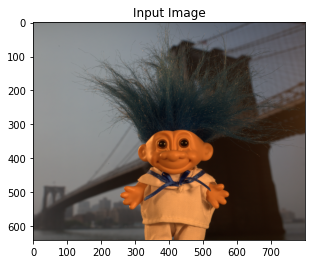

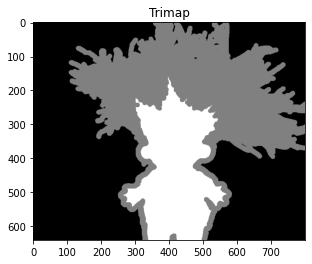

In [25]:
plt.title('Input Image')
plt.imshow(image)
plt.show()

# transform two channel trimap back to single channel
trimap_im =  trimap[:,:,1] + (1-np.sum(trimap,-1))/2
plt.title('Trimap')
plt.imshow(trimap_im, cmap='gray', vmin=0, vmax=1)
plt.show()

In [26]:
fg, bg, alpha = pred(image, trimap, model)

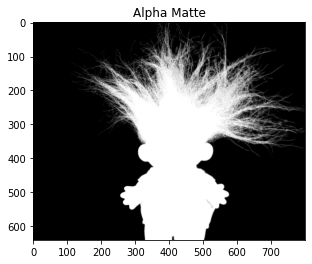

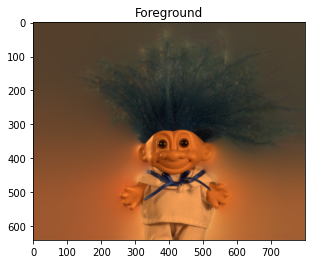

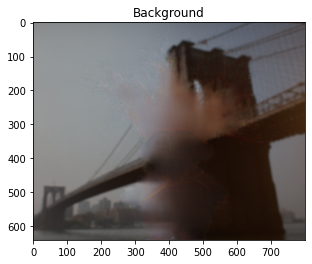

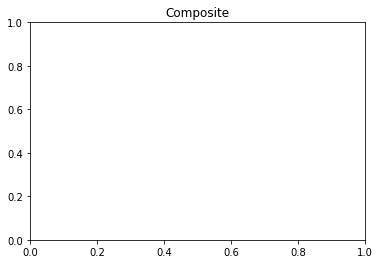

In [29]:
plt.title('Alpha Matte')
plt.imshow(alpha, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.title('Foreground')
plt.imshow(fg)
plt.show()
plt.title('Background')
plt.imshow(bg)
plt.show()
plt.title('Composite')
#plt.imshow(fg*alpha[:,:,None])


plt.show()

(640, 800)


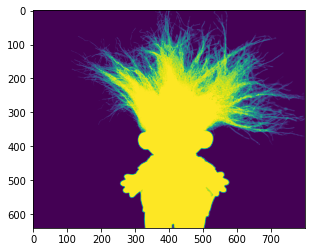

In [31]:
print(alpha.shape)
plt.imshow(alpha)

plt.show()

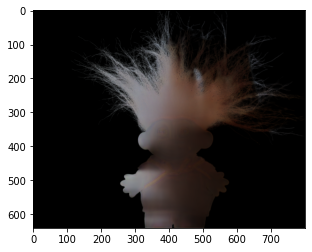

In [33]:
plt.imshow(bg* alpha[:,:,None])
plt.show()

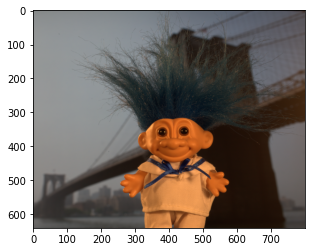

In [38]:
plt.imshow((fg*alpha[:,:,None])+(bg* (1.0-alpha[:,:,None])))
plt.show()

(671, 800, 3)
(640, 800, 3)


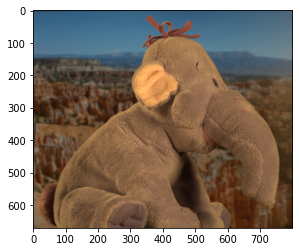

In [49]:
bgr = read_image('./examples/images/elephant.png')
plt.imshow(bgr)
print(bgr.shape)
bgrs = cv2.resize(bgr, (800, 640))
print(bgrs.shape)


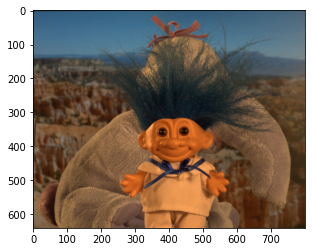

In [50]:
plt.imshow((fg*alpha[:,:,None])+(bgrs* (1.0-alpha[:,:,None])))
plt.show()